<a href="https://www.kaggle.com/code/abhiramkuruva/mnydetection?scriptVersionId=117074156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from sklearn.model_selection import train_test_split
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
DATADIR='../input/segmented/indian currency__final/train'

cats=['10','100','20','200','2000','50','500'] 
IMG_SIZE=250

In [3]:
training_data=[]
def create_training_data():
    for category in cats:
        path=os.path.join(DATADIR, category)
        class_num=cats.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))#,cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num]) 
            except Exception as e:
                pass
create_training_data()    

In [4]:
import random
random.shuffle(training_data)

In [5]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories) 
    y.append(label)

In [6]:
X=np.array(X)

In [7]:
X[0] 

array([[[ 26,  50,  10],
        [ 31,  55,  15],
        [ 35,  53,  16],
        ...,
        [ 39,  80,  35],
        [ 39,  75,  31],
        [ 38,  74,  30]],

       [[ 38,  59,  20],
        [ 37,  56,  16],
        [ 32,  50,  10],
        ...,
        [ 45,  84,  39],
        [ 43,  79,  35],
        [ 40,  76,  32]],

       [[ 42,  58,  17],
        [ 38,  54,  13],
        [ 34,  48,   7],
        ...,
        [ 49,  88,  43],
        [ 46,  82,  38],
        [ 44,  80,  36]],

       ...,

       [[ 43,  40,  55],
        [ 32,  35,  46],
        [ 42,  53,  57],
        ...,
        [ 97, 119, 131],
        [ 89, 112, 127],
        [ 58,  84,  98]],

       [[ 43,  45,  45],
        [ 34,  41,  39],
        [ 44,  58,  53],
        ...,
        [ 92, 111, 132],
        [ 55,  80,  95],
        [ 37,  66,  75]],

       [[ 38,  43,  34],
        [ 33,  43,  33],
        [ 46,  62,  52],
        ...,
        [ 95, 113, 136],
        [ 39,  66,  80],
        [ 20,  52,  58]]

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
#x_train=np.array(x_train)
y_train=np.array(y_train)

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.Conv2D(150, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(110, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(100,3,activation='relu'),
  layers.MaxPooling2D(),  
  layers.Flatten(),
  layers.Dense(90,activation="relu"),
  layers.Dense(70,activation="relu"),
  layers.Dense(35,activation="relu"),
  layers.Dense(7,activation="sigmoid")  
])

2023-01-23 07:20:59.899012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 07:20:59.999950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 07:21:00.001173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 07:21:00.002882: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


In [13]:
model.fit(x_train,y_train,epochs=20)

2023-01-23 07:21:03.241234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-01-23 07:21:04.611242: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


35/35 [==============================] - 14s 152ms/step - loss: 1.9614 - accuracy: 0.1653
Epoch 2/20
35/35 [==============================] - 4s 110ms/step - loss: 1.8785 - accuracy: 0.1984
Epoch 3/20
35/35 [==============================] - 4s 111ms/step - loss: 1.4381 - accuracy: 0.4236
Epoch 4/20
35/35 [==============================] - 4s 110ms/step - loss: 0.9999 - accuracy: 0.6095
Epoch 5/20
35/35 [==============================] - 4s 110ms/step - loss: 0.8341 - accuracy: 0.6729
Epoch 6/20
35/35 [==============================] - 4s 110ms/step - loss: 0.4887 - accuracy: 0.8114
Epoch 7/20
35/35 [==============================] - 4s 110ms/step - loss: 0.3433 - accuracy: 0.8677
Epoch 8/20
35/35 [==============================] - 4s 110ms/step - loss: 0.2341 - accuracy: 0.9142
Epoch 9/20
35/35 [==============================] - 4s 111ms/step - loss: 0.1971 - accuracy: 0.9276
Epoch 10/20
35/35 [==============================] - 4s 110ms/step - loss: 0.1339 - accuracy: 0.9607
Epoch 11/

In [14]:
ypred=model.predict(x_test)

In [15]:
ypred[0].argmax(), y_test[0]

(0, 4)

In [16]:
cats[ypred[0].argmax()],cats[y_test[0]]

('10', '2000')

In [17]:
y_pri=[]
for i in ypred:
    y_pri.append(np.argmax(i))
    

In [18]:
def imsh_test(i):
    plt.imshow(x_test[i])
    print(cats[y_pri[i]])

In [19]:
df=pd.DataFrame(y_pri)

In [20]:
df.columns=['index']

In [21]:
df[df['index']==0].head(7)

,index
0,0
15,0
29,0
38,0
46,0
54,0
58,0


20


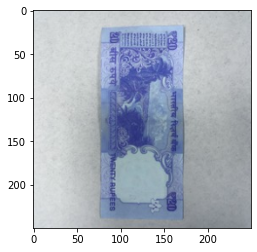

In [22]:
plt.imshow(x_test[22])
print(cats[y_pri[22]])

In [23]:
x_test.shape

(280, 250, 250, 3)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_pri))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72        48
           1       0.90      0.86      0.88        42
           2       0.96      0.66      0.78        41
           3       0.72      0.82      0.77        38
           4       0.71      0.43      0.54        35
           5       0.83      0.29      0.43        34
           6       0.52      0.90      0.66        42

    accuracy                           0.70       280
   macro avg       0.76      0.68      0.68       280
weighted avg       0.75      0.70      0.69       280



In [26]:
from keras.models import load_model


In [27]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [28]:
def predictt(img):
    d1=np.expand_dims(img, axis=0)
    return cats[np.argmax(model.predict(d1))]
    

In [29]:
predictt(x_test[20])

'2000'